In [20]:
# General Libraries
import re
import time
import warnings
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from collections import Counter
warnings.filterwarnings("ignore")

# Visualizations
import seaborn as sns
from termcolor import colored
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import (train_test_split, GridSearchCV,
                                     StratifiedKFold)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier,  
                              GradientBoostingClassifier,ExtraTreesClassifier)
from sklearn.model_selection import cross_validate
from sklearn.metrics import (ConfusionMatrixDisplay, precision_score, recall_score)


from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,roc_curve, auc, confusion_matrix, classification_report,\
    ConfusionMatrixDisplay

import xgboost as xgb
from lightgbm import LGBMClassifier
from getml.predictors import XGBoostClassifier
import pickle
'''
# Imblearn
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import (SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE)
from imblearn.under_sampling import (TomekLinks, NearMiss, AllKNN,
                                     EditedNearestNeighbours, 
                                     RepeatedEditedNearestNeighbours) 
from imblearn.combine import SMOTETomek, SMOTEENN

# SHAP
import shap
'''
import shap
shap.initjs()


In [21]:
df = pd.read_csv('data/g4_filtered.csv', nrows=100000)

X = df.drop(['is_fraud'], axis=1)
y = df['is_fraud']
(X_trainval, X_holdout, y_trainval, y_holdout) = train_test_split(X, y, 
                                                                  random_state=11, test_size=0.25,
                                                                  stratify=y)


In [33]:
# read model
pkl_file = open('data/gbc_hypertuned.pkl', 'rb')
model = pickle.load(pkl_file)
pkl_file.close()

# read shap
pkl_file = open('data/shap_values.pkl', 'rb')
shap_values = pickle.load(pkl_file)
pkl_file.close()


# explainer
pkl_file = open('data/explainer.pkl', 'rb')
explainer = pickle.load(pkl_file)
pkl_file.close()

In [23]:
y_preds = model.predict(X_holdout)
holdout_score = recall_score(y_holdout, y_preds)
print(f"Holdout set score: {holdout_score:.2f}")

Holdout set score: 0.99


# Global

In [24]:
model

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('nearmiss', NearMiss()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=4, max_features='sqrt',
                                            n_estimators=200))])

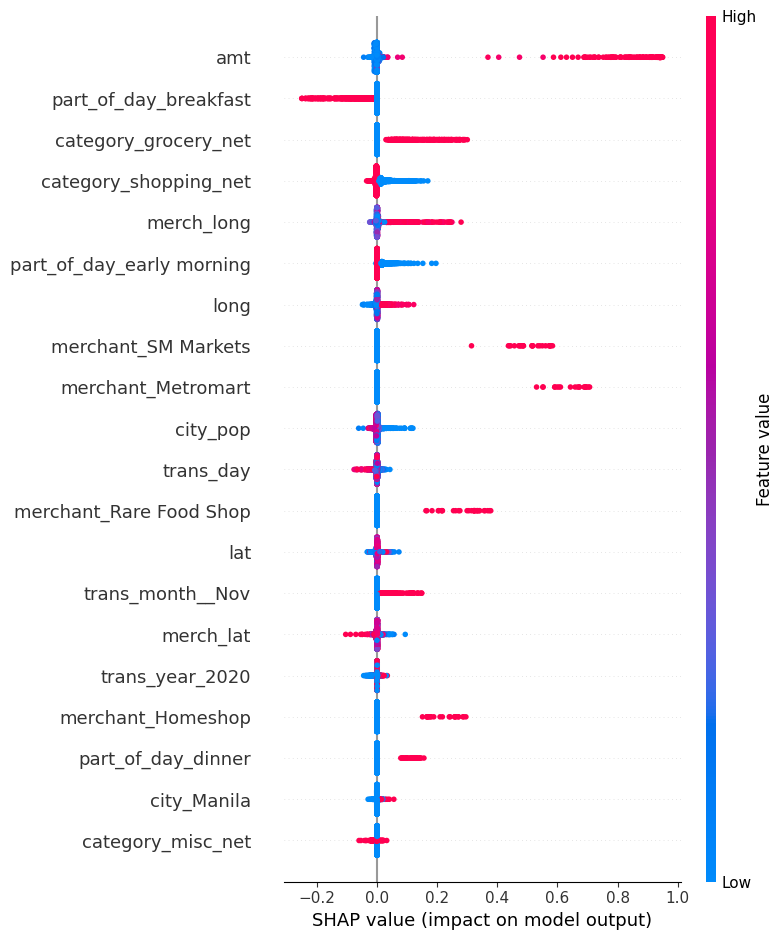

In [25]:
shap.summary_plot(shap_values[1], X_holdout, plot_type="dot")

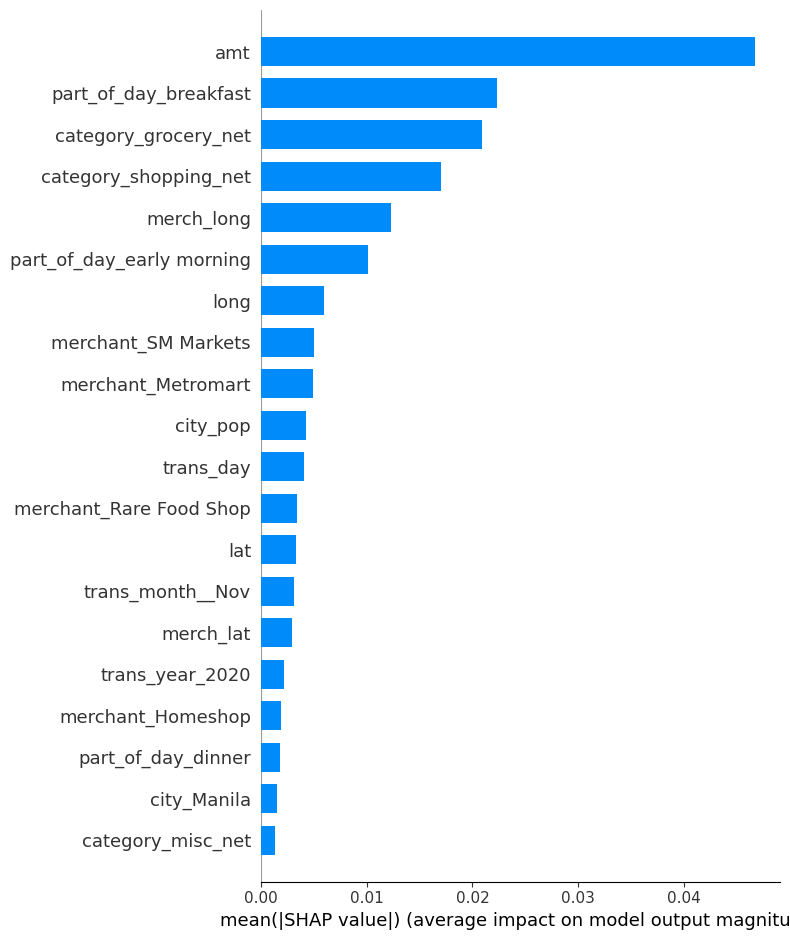

In [26]:
shap.summary_plot(shap_values[1], X_holdout, plot_type="bar")

# Local

In [27]:
df_ho=X_holdout
df_ho=df_ho.reset_index(drop=True)
df_ho

,lat,long,city_pop,amt,merch_lat,merch_long,trans_day,is_net,gender_M,city_Angeles City,...,trans_month__Mar,trans_month__May,trans_month__Nov,trans_month__Oct,trans_month__Sep,part_of_day_afternoon,part_of_day_breakfast,part_of_day_dinner,part_of_day_early morning,part_of_day_lunch
0,13.7500,121.0500,329874,89.61,13.150815,120.488629,29,True,1,0,...,1,0,0,0,0,0,0,0,1,0
1,6.7500,125.3500,169393,133.28,6.856809,124.866121,23,True,1,0,...,0,0,1,0,0,0,0,0,1,0
2,14.4297,120.9367,403785,176.98,13.527169,120.331571,2,True,1,0,...,0,0,0,0,0,0,0,0,1,0
3,15.2167,120.5833,250799,8.06,14.845667,120.040797,8,True,1,0,...,0,0,0,0,0,0,0,0,1,0
4,14.6625,120.9567,365525,1.20,15.007321,120.115055,4,True,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2602,6.7500,125.3500,169393,683.78,6.822828,125.825993,26,True,1,0,...,0,0,0,0,1,0,1,0,0,0
2603,8.2333,124.2500,342618,6.14,8.117563,124.501538,16,True,1,0,...,0,0,0,0,0,0,0,0,1,0
2604,13.6167,123.1667,196003,8.39,14.499598,122.866729,20,True,1,0,...,0,0,0,0,0,0,0,0,1,0
2605,15.1472,120.5847,411634,5.06,16.128301,120.210914,13,True,1,1,...,0,1,0,0,0,0,1,0,0,0


In [28]:
y_preds
data=y_holdout.to_frame()
data["prediction"]=y_preds
data = data.reset_index(drop=True)
data[(data.is_fraud==1) & (data.prediction==0)]


,is_fraud,prediction
2309,1,0


In [29]:
explainer

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('nearmiss', NearMiss()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=4, max_features='sqrt',
                                            n_estimators=200))])

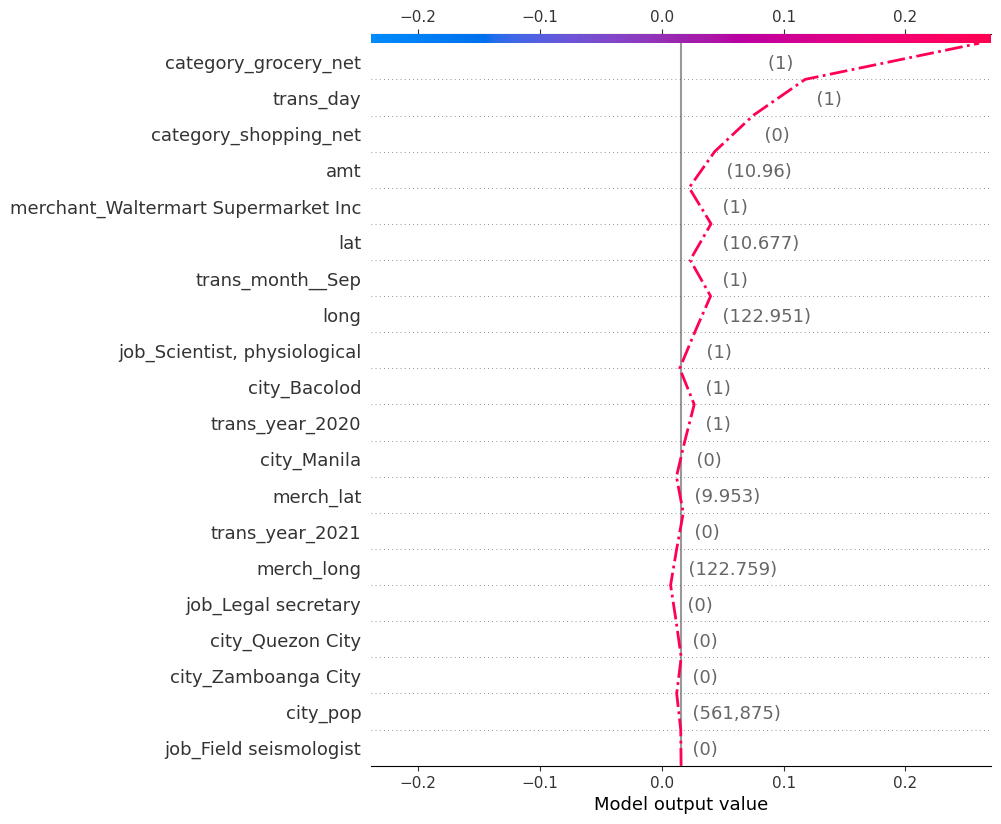

In [34]:
num=2309

expected_value = explainer.expected_value[1]
shap.decision_plot(expected_value, shap_values[1][num],\
                   X_holdout.iloc[num], highlight=0)

In [35]:
display(X_holdout.iloc[[num]])
print("y_holdout actual- %s"  % (y_holdout.iloc[num]))
print("y_holdout pred- %s"  % (y_preds[num]))


,lat,long,city_pop,amt,merch_lat,merch_long,trans_day,is_net,gender_M,city_Angeles City,...,trans_month__Mar,trans_month__May,trans_month__Nov,trans_month__Oct,trans_month__Sep,part_of_day_afternoon,part_of_day_breakfast,part_of_day_dinner,part_of_day_early morning,part_of_day_lunch
6113,10.6765,122.9509,561875,10.96,9.953101,122.759037,1,True,1,0,...,0,0,0,0,1,0,0,0,1,0


y_holdout actual- 1
y_holdout pred- 0


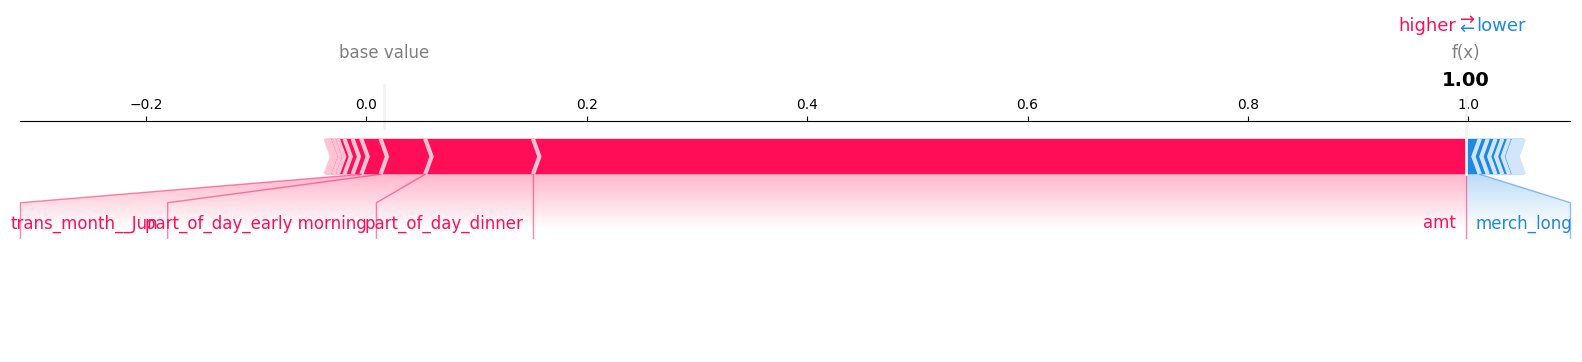

In [36]:
shap.force_plot(explainer.expected_value[1], 
                shap_values[1][2538], X_holdout.columns, matplotlib=True)

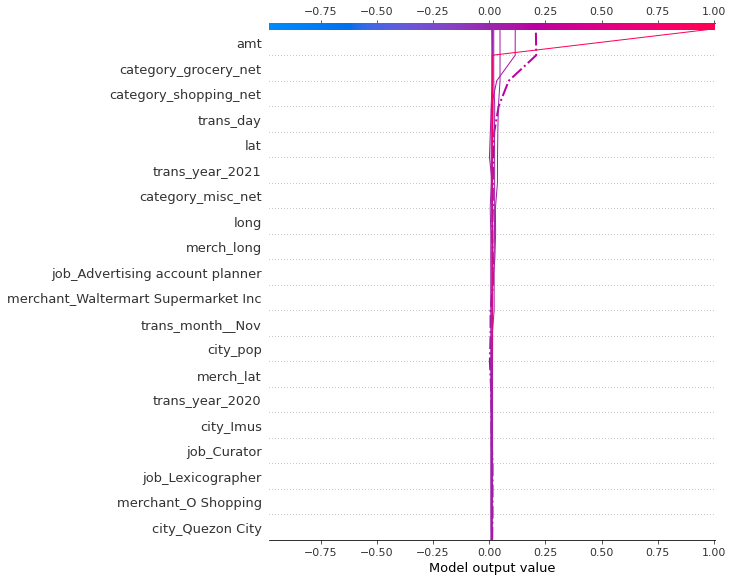

time: 312 ms (started: 2022-10-27 20:26:00 +08:00)


In [105]:
my_list=[0,1,2,3,4,5,6,7]
a=np.array(my_list)

shap.decision_plot(expected_value, shap_values[1][a],\
                   X_holdout.iloc[a], highlight=0)

## Test

In [108]:
num=2538

expected_value = explainer.expected_value[1]
shap.decision_plot(expected_value, shap_values[1][num],\
                   X_holdout.loc[num], highlight=0)

KeyError: 2538

time: 31 ms (started: 2022-10-27 20:30:33 +08:00)


In [100]:
sample_test_idx

array([ 162,   -1,   -1,   -1,   -1,   -1,   -1,   -1, 1965], dtype=int64)

time: 0 ns (started: 2022-10-27 20:23:53 +08:00)


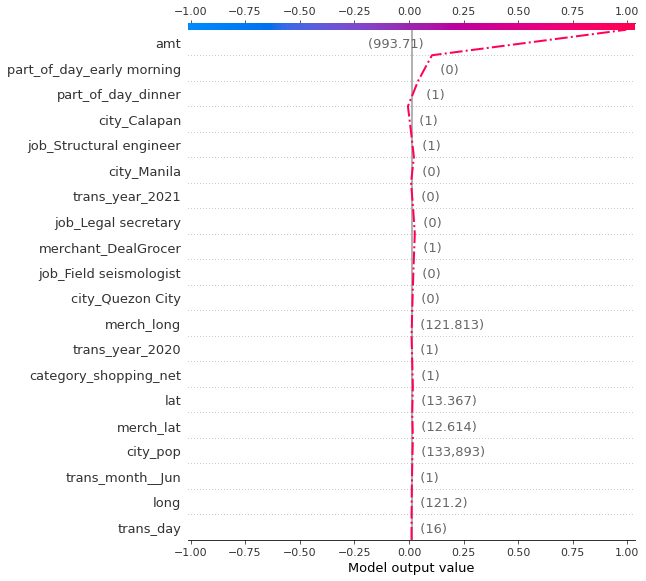

time: 407 ms (started: 2022-10-27 20:23:06 +08:00)


In [98]:
orig_plt_params = plt.rcParams
#Get indexes for a Group of Points
sample_test_idx = X_holdout.index.\
                    get_indexer_for([5,6,7,18,19,21,24,25,27])

#To highlight False Negatives from these points
FN = (y_preds[sample_test_idx] == 1) &\
     (y_holdout.iloc[sample_test_idx] == 0).to_numpy() 

#Set the expected value for the positive class
expected_value = explainer.expected_value[1]

#Reset matplotlib style so that it's not seaborn's
#sns.reset_orig()
#plt.rcParams.update(orig_plt_params)

#Display decision plot with FN highlighted
shap.decision_plot(expected_value, shap_values[1][num],\
                   X_holdout.iloc[num], highlight=0)


In [106]:
shap.force_plot(explainer.expected_value, 
                shap_values[num], X_holdout.columns, matplotlib=True)

IndexError: list index out of range

time: 16 ms (started: 2022-10-27 20:29:53 +08:00)
